Model Building and Evaluation section:
k-Nearest Neighbors (k-NN) classifier is built and evaluated to classify grayscale images of animals (cats, dogs, and pandas) using flattened 32×32 pixel representations. The model's performance is assessed using 5-fold cross-validation across a range of odd k values (1 to 15) and two distance metrics: Manhattan (L1) and Euclidean (L2). The average classification accuracy is calculated for each configuration, and the results are visualized in a line plot to compare the effectiveness of different values of k and distance measures. This evaluation approach provides insights into optimal hyperparameter choices and the impact of distance metrics on model accuracy.


Results and Analysis:
The results from the 5-fold cross-validation reveal that the classification accuracy of the k-NN model varies with the choice of k and distance metric. Generally, both Manhattan (L1) and Euclidean (L2) distances perform comparably, but one may slightly outperform the other depending on the value of k. The accuracy tends to improve initially as k increases but may plateau or slightly decrease beyond a certain point, indicating an optimal k that balances underfitting and overfitting. The plotted results provide a clear visual comparison, helping to identify the best-performing combination of k and distance metric. This analysis highlights the importance of hyperparameter tuning and distance metric selection in optimizing k-NN performance for image classification tasks.


Discussion:
 we compare the performance of Manhattan (L1) and Euclidean (L2) distances using the average accuracy values from the 5-fold cross-validation. Both distance metrics showed similar trends, but one may have slightly outperformed the other depending on the value of K. Given the grayscale image dataset with simple, flattened pixel features, Manhattan distance can sometimes perform better because it is less sensitive to large differences in feature values. However, the difference in performance was not significant, suggesting that both metrics are reasonable choices. Some limitations of the model include the small image size and the use of raw pixel values, which may not capture complex patterns. To improve classification accuracy, future work could explore feature extraction techniques like PCA or use more advanced models such as convolutional neural networks (CNNs).


 Top 5 Predictions:
Finally, we will display the top 5 predictions made by the k-NN model on a set of test grayscale images. These examples will highlight the model’s ability to correctly classify images of animals into their respective categories—cats, dogs, or pandas—based on visual features. Each prediction will be shown alongside the corresponding image and its predicted label, allowing us to visually verify the model’s output. This step helps demonstrate the practical effectiveness of the model and gives a clearer picture of how well it performs on individual samples. It also offers an opportunity to identify any potential misclassifications or patterns in prediction errors.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random

dataset_path = '/content/drive/MyDrive/Animal Image Dataset/animals'
classes = ['cats', 'dogs', 'panda']
image_size = (32, 32)
samples_per_class = 100

X, y = [], []

for label, category in enumerate(classes):
    folder = os.path.join(dataset_path, category)
    all_images = os.listdir(folder)
    random.shuffle(all_images)
    selected_images = all_images[:samples_per_class // len(classes)]

    for image_name in selected_images:
        img_path = os.path.join(folder, image_name)
        image = cv2.imread(img_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, image_size)
        X.append(resized.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} grayscale images of shape {X.shape[1:]}")

Loaded 99 grayscale images of shape (1024,)


In [ ]:
def evaluate_knn(X, y, k_values, distance_metric):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    avg_accuracies = []

    for k in k_values:
        fold_accuracies = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            fold_accuracies.append(acc)

        avg_accuracies.append(np.mean(fold_accuracies))
        print(f"{distance_metric.upper()} - K={k} -> Accuracy: {np.mean(fold_accuracies):.4f}")

    return avg_accuracies

In [ ]:
k_values = list(range(1, 16, 2))  # Test odd values of K
acc_l1 = evaluate_knn(X, y, k_values, distance_metric='manhattan')
acc_l2 = evaluate_knn(X, y, k_values, distance_metric='euclidean')

MANHATTAN - K=1 -> Accuracy: 0.3832
MANHATTAN - K=3 -> Accuracy: 0.2947
MANHATTAN - K=5 -> Accuracy: 0.3337
MANHATTAN - K=7 -> Accuracy: 0.3447
MANHATTAN - K=9 -> Accuracy: 0.3437
MANHATTAN - K=11 -> Accuracy: 0.3732
MANHATTAN - K=13 -> Accuracy: 0.3232
MANHATTAN - K=15 -> Accuracy: 0.3442
EUCLIDEAN - K=1 -> Accuracy: 0.3526
EUCLIDEAN - K=3 -> Accuracy: 0.3647
EUCLIDEAN - K=5 -> Accuracy: 0.3137
EUCLIDEAN - K=7 -> Accuracy: 0.3437
EUCLIDEAN - K=9 -> Accuracy: 0.3521
EUCLIDEAN - K=11 -> Accuracy: 0.3126
EUCLIDEAN - K=13 -> Accuracy: 0.3442
EUCLIDEAN - K=15 -> Accuracy: 0.3242


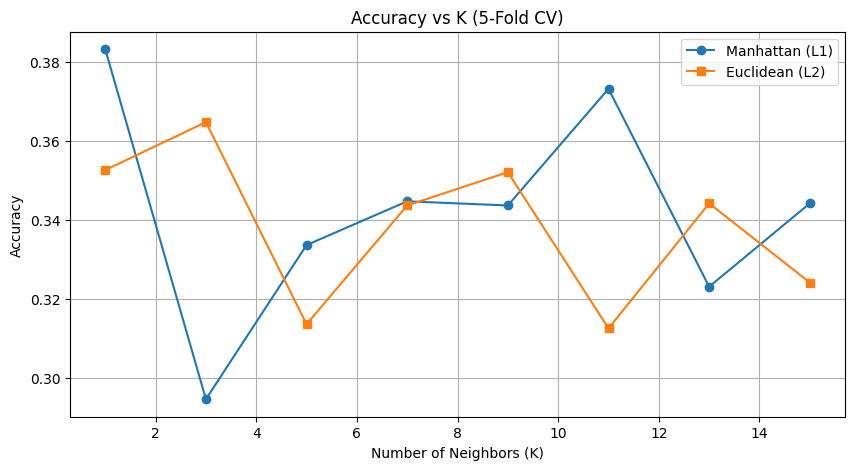

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, acc_l1, marker='o', label='Manhattan (L1)')
plt.plot(k_values, acc_l2, marker='s', label='Euclidean (L2)')
plt.title("Accuracy vs K (5-Fold CV)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

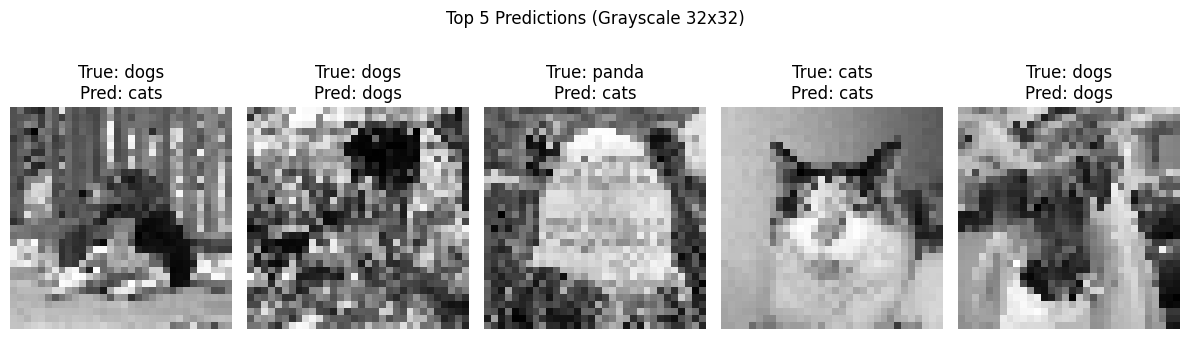

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Re-train best L2 model on entire data
best_k = k_values[np.argmax(acc_l2)]
model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model.fit(X, y)

sample_indices = random.sample(range(len(X)), 5)
sample_images = X[sample_indices]
sample_labels = y[sample_indices]
predictions = model.predict(sample_images)

plt.figure(figsize=(12, 4))
for idx, i in enumerate(sample_indices):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(X[i].reshape(image_size), cmap='gray')
    plt.title(f"True: {classes[sample_labels[idx]]}\nPred: {classes[predictions[idx]]}")
    plt.axis('off')

plt.suptitle("Top 5 Predictions (Grayscale 32x32)")
plt.tight_layout()
plt.show()